 # Settings

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 그리기
%matplotlib inline

# 그래프 마이너스 폰트 깨지는 현상 해결을 위함
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
## 폰트 설정
mpl.rcParams['font.family'] = 'NanumGothic'

In [3]:
# 폰트바뀌었는지 확인
print (plt.rcParams['font.family'] )

['NanumGothic']


In [4]:
train = pd.read_csv('C:/Users/user/Desktop/workSpace/분석/데이터/bike-sharing-demand/train.csv', parse_dates = ["datetime"])
train.shape

(10886, 12)

In [5]:
test = pd.read_csv('C:/Users/user/Desktop/workSpace/분석/데이터/bike-sharing-demand/test.csv', parse_dates = ["datetime"])
test.shape

(6493, 9)

 # Feature Engineering

In [6]:
# train 데이터에 'datetime'을 나누어 추가
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [7]:
# test 데이터에 "datetime"을 나누어 추가
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 16)

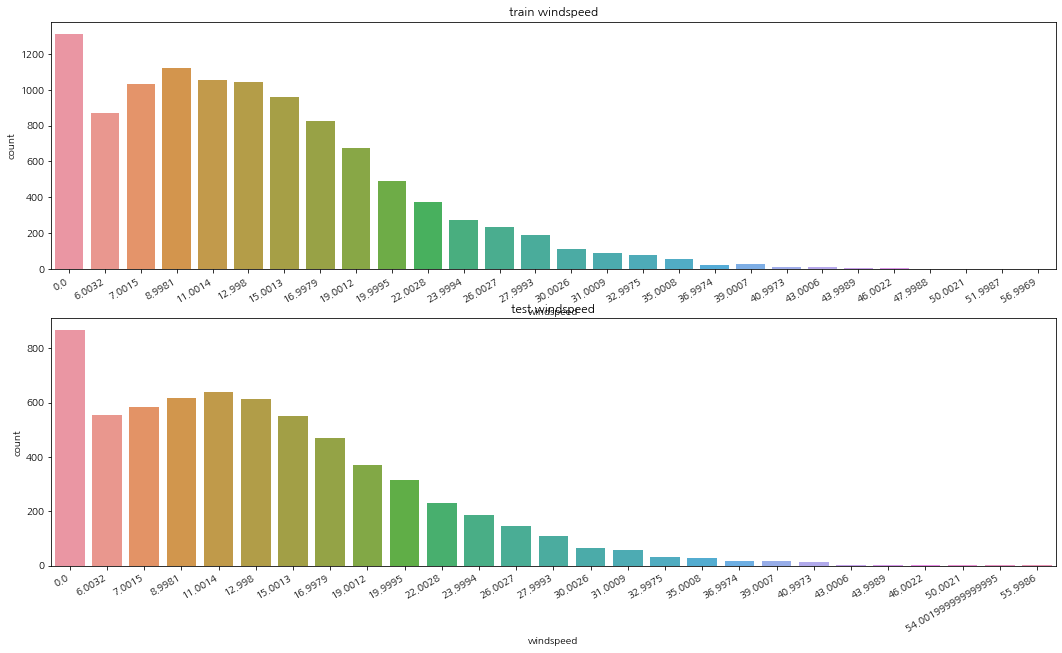

In [11]:
# "windspeed" 풍속 칼럼의 '0'값의 문제가 있는 것을 파악하기 위해 해당 칼럼의 값들을 시각화출력
fig, axes = plt.subplots(nrows = 2)
fig.set_size_inches(18, 10)

plt.sca(axes[0])
plt.xticks(rotation = 30, ha = 'right')
axes[0].set(ylabel = 'Count', title = "train windspeed")
sns.countplot(data = train, x = "windspeed", ax = axes[0])

plt.sca(axes[1])
plt.xticks(rotation = 30, ha = 'right')
axes[1].set(ylabel = 'Count', title = "test windspeed")
sns.countplot(data = test, x = "windspeed", ax = axes[1])

 * "windspeed"칼럼에 분석의 정확도를 올리기 위해 '0'에 특정 값을 넣는다. (결측값 처리, 이동평균 등과 같은 방법들이 존재)
 * 다음의 코드는 일괄적으로 평균을 집어넣는 방법
 * train.loc[train["windspeed"] == 0, "windspeed"] = train["windspeed"].mean()
 * test.loc[test["windspeed"] == 0, "windspeed"] = test["windspeed"].mean() 

In [19]:
 # 다음의 방법은 풍속이 '0'인 그룹과 아닌 그룹을 나누어 머신러닝으로 예측해 분석을 실시
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    #풍속이 '0'인 집단과 아닌 집단을 나눈다.
    dataWind0 = data.loc[data['windspeed'] == 0]
    dataWindNot0 = data.loc[data['windspeed'] != 0]
    
    # 풍속을 예측할 요인 선택
    wCol = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]
    
    # 풍속이 '0'이 아닌 집단의 데이터 타입을 스트링으로 바꿔준다.
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
    
    # 랜덤포레스트 사용
    rfModel_wind = RandomForestClassifier()
    
    # wCol에 있는 요인들을 풍속을 학습
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])
    
    # 학습한 값을 바탕으로 풍속이 '0'인 집단을 예측
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])
    
    # 예측한 값을 비교하기 위해 새로운 데이터프레임을 만든다
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    # 값이 '0'인 집단에 예측값을 대입
    predictWind0["windspeed"] = wind0Values
    
    # dataWindNot0 집단과 예측한 집단을 합친다.
    data = predictWindNot0.append(predictWind0)
    
    # 풍속의 데이터 타입 float로 지정
    data["windspeed"] = data["windspeed"].astype("float")
    
    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data

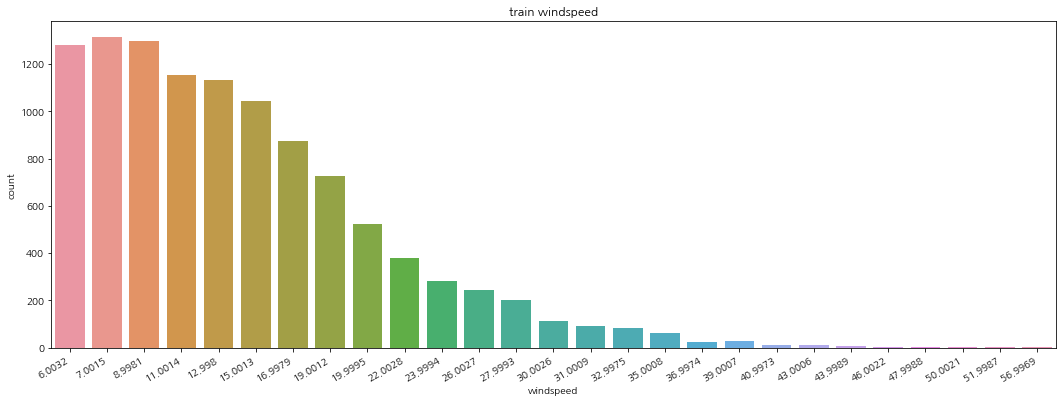

In [20]:
# 0값을 조정한다. ???
train = predict_windspeed(train)
# test = predict_windspeed(test)

# windspeed의 '0'값을 조정한 데이터를 시각화
fig, ax1 = plt.subplots()
fig.set_size_inches(18, 6)

plt.sca(ax1)
plt.xticks(rotation = 30, ha = 'right')
ax1.set(ylabel = 'Count', title = "train windspeed")
sns.countplot(data = train, x = "windspeed", ax = ax1)